In [11]:
%matplotlib inline
import pandas as pd
from nltk.tokenize import wordpunct_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
train_data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [5]:
for toxic_comment in train_data[train_data.toxic==1].iloc[:5].comment_text:
    print toxic_comment
    print '-'*100

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
----------------------------------------------------------------------------------------------------
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
----------------------------------------------------------------------------------------------------
Bye! 

Don't look, come or think of comming back! Tosser.
----------------------------------------------------------------------------------------------------
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head ba

In [6]:
for toxic_comment in train_data[train_data.toxic==0].iloc[:5].comment_text:
    print toxic_comment
    print '-'*100

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
----------------------------------------------------------------------------------------------------
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
----------------------------------------------------------------------------------------------------
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
----------------------------------------------------------------------------------------------------
"
More
I can't make any real suggestions on improvement - I wondered if the section s

## Simple statistics

In [7]:
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for column in columns:
    print '{}: {:.2f}% of pos class'.format(column, train_data[column].mean()*100)

toxic: 9.58% of pos class
severe_toxic: 1.00% of pos class
obscene: 5.29% of pos class
threat: 0.30% of pos class
insult: 4.94% of pos class
identity_hate: 0.88% of pos class


In [15]:
print 'Total train data count', train_data.shape[0]
print 'Total test data count', test_data.shape[0]

Total train data count 159571
Total test data count 153164


Average comment lenghts in train is 82.78544347030476 tokens
Average comment lenghts in test is 80.86767778329111 tokens


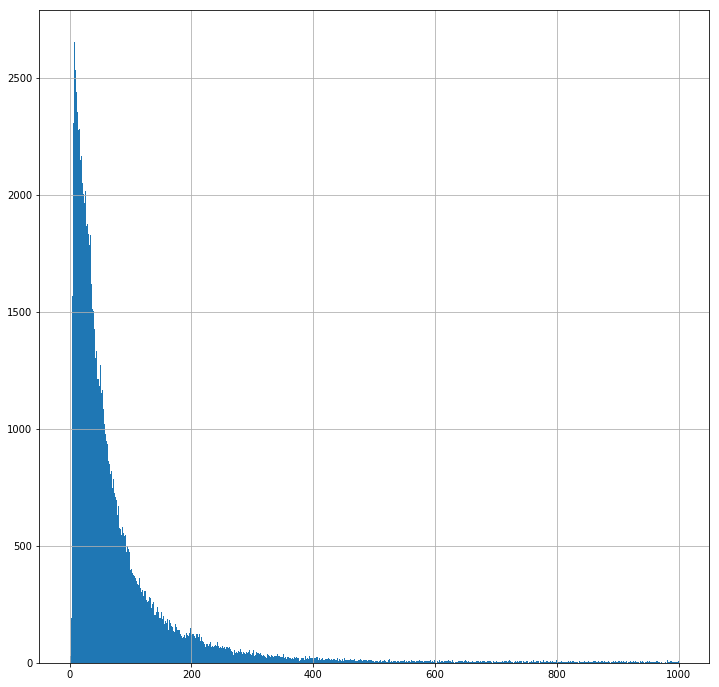

In [16]:
tokenized_texts_train = train_data.comment_text.apply(wordpunct_tokenize)
tokenized_texts_test = test_data.comment_text.apply(wordpunct_tokenize)
comment_lengths_train = tokenized_texts_train.apply(len)
comment_lengths_test = tokenized_texts_test.apply(len)
print 'Average comment lenghts in train is', comment_lengths_train.mean(), 'tokens'
print 'Average comment lenghts in test is', comment_lengths_test.mean(), 'tokens'
comment_lengths_train.hist(bins=np.arange(0.5, 1000, 1.0))
plt.show()
comment_lengths_test.hist(bins=np.arange(0.5, 1000, 1.0))
plt.show()

In [17]:
total_tokens_train = 0
vocab_train = set()
lvocab_train = set()
for comment in tqdm(tokenized_texts_train):
    for token in comment:
        total_tokens_train += 1
        ltoken = token.lower()
        if token not in vocab_train: vocab_train.add(token)
        if ltoken not in lvocab_train: lvocab_train.add(ltoken)

100%|██████████| 159571/159571 [00:06<00:00, 24609.08it/s]


In [18]:
total_tokens_test = 0
vocab_test = set()
lvocab_test = set()
for comment in tqdm(tokenized_texts_test):
    for token in comment:
        total_tokens_test += 1
        ltoken = token.lower()
        if token not in vocab_test: vocab_test.add(token)
        if ltoken not in lvocab_test: lvocab_test.add(ltoken)

100%|██████████| 153164/153164 [00:06<00:00, 24486.84it/s]


In [14]:
print 'All tokens count is', total_tokens_train
print 'Unique tokens count is', len(vocab_train)
print 'Unique tokens in lower case', len(lvocab_train)

All tokens count is 13210156
Unique tokens count is 242620
Unique tokens in lower case 197170


In [19]:
print 'All tokens count is', total_tokens_test
print 'Unique tokens count is', len(vocab_test)
print 'Unique tokens in lower case', len(lvocab_test)

All tokens count is 12386017
Unique tokens count is 279378
Unique tokens in lower case 230181


In [20]:
intersection = vocab_train.intersection(vocab_test)
lintersection = lvocab_train.intersection(lvocab_test) 
print 'Test/Train vocab intersecion', 1.0*len(intersection)/len(vocab_test)
print 'Test/Train lower case vocab intersection', 1.0*len(lintersection)/len(lvocab_test)

Test/Train vocab intersecion 0.386440593032
Test/Train lower case vocab intersection 0.379171173989


In [37]:
%store sorted(lintersection) >> lintersection.txt

Writing 'sorted(lintersection)' (list) to file 'lintersection.txt'.


In [38]:
%store sorted(intersection) >> intersection.txt

Writing 'sorted(intersection)' (list) to file 'intersection.txt'.


In [39]:
nit_vocab = vocab_test - vocab_train
nit_lvocab = lvocab_test - lvocab_train

In [40]:
%store sorted(nit_lvocab) >> nit_lvocab.txt
%store sorted(nit_vocab) >> nit_vocab.txt

Writing 'sorted(nit_lvocab)' (list) to file 'nit_lvocab.txt'.
Writing 'sorted(nit_vocab)' (list) to file 'nit_vocab.txt'.
